Loading the blood donations data

In [159]:
import seaborn as sns
import random
random.seed(100)
import pandas as pd
import sklearn
data=pd.read_csv('C:/Users/sadhv/OneDrive/Desktop/technocolabs/transfusion.csv')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Inspecting transfusion DataFrame

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [161]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:ylabel='Monetary (c.c. blood)'>

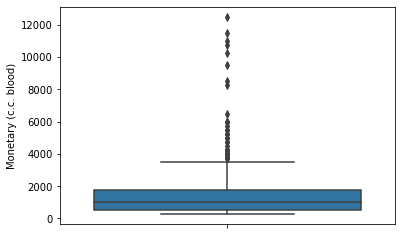

In [162]:
sns.boxplot(y=data['Monetary (c.c. blood)'])

<AxesSubplot:ylabel='Monetary (c.c. blood)'>

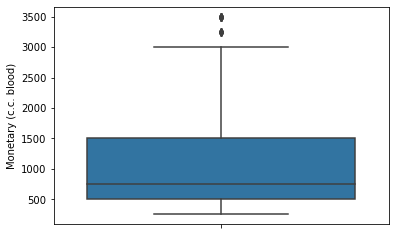

In [163]:
hp=[]
def inqr(hp):
    Q1=hp.quantile(0.25)
    Q3=hp.quantile(0.75)
    IQR=Q3-Q1
    Upper_Whisker = Q3+1.5*IQR
    return Upper_Whisker
uw=inqr(data['Monetary (c.c. blood)'])
data = data[data['Monetary (c.c. blood)']< uw]
sns.boxplot(y=data['Monetary (c.c. blood)'])

<AxesSubplot:ylabel='Time (months)'>

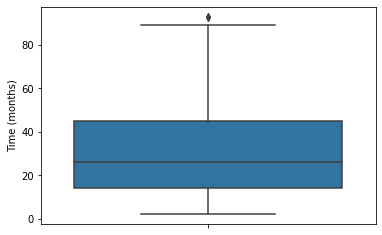

In [164]:
uw=inqr(data['Time (months)'])
data = data[data['Time (months)']< uw]
sns.boxplot(y=data['Time (months)'])

Creating target column

In [165]:
target=data['whether he/she donated blood in March 2007']
data=data.drop(['whether he/she donated blood in March 2007'],axis=1)
target.value_counts()

0    540
1    158
Name: whether he/she donated blood in March 2007, dtype: int64

Checking target incidence

In [166]:
target.value_counts(normalize=True)*100

0    77.363897
1    22.636103
Name: whether he/she donated blood in March 2007, dtype: float64

Splitting transfusion into train and test datasets


In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,target,stratify=target,test_size=0.3,random_state=42)
Y_train.value_counts(normalize=True)*100

0    77.459016
1    22.540984
Name: whether he/she donated blood in March 2007, dtype: float64

In [168]:
Y_test.value_counts(normalize=True)*100

0    77.142857
1    22.857143
Name: whether he/she donated blood in March 2007, dtype: float64

Selecting model using TPOT

In [171]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
model=TPOTClassifier(generations=5,population_size=20,scoring='roc_auc',verbosity=2,cv=5)
model.fit(X_train,Y_train.values.ravel())
model.export('BloodTransfusion.py')


Generation 1 - Current best internal CV score: 0.7275582137161084

Generation 2 - Current best internal CV score: 0.7275582137161084

Generation 3 - Current best internal CV score: 0.7275582137161084

Generation 4 - Current best internal CV score: 0.728799043062201

Generation 5 - Current best internal CV score: 0.7295199362041467

Best pipeline: LogisticRegression(ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=20, min_samples_split=2, n_estimators=100), C=15.0, dual=False, penalty=l2)


In [172]:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
print("\nAUC score:%f"%(roc_auc_score(Y_test,Y_pred)*100))
print("\nAccuracy score:%f"%(accuracy_score(Y_test,Y_pred)*100))


AUC score:61.188272

Accuracy score:78.571429


Checking the variance

In [173]:
data.var()

Recency (months)             66.695589
Frequency (times)            11.209868
Monetary (c.c. blood)    700616.744706
Time (months)               481.003622
dtype: float64

 Log normalization

In [174]:
import numpy as np
data['LogNormalMonetary']=np.log(data['Monetary (c.c. blood)'])
data=data.drop(['Monetary (c.c. blood)'],axis=1)
data.head()

,Recency (months),Frequency (times),Time (months),LogNormalMonetary
1,0,13,28,8.086410
5,4,4,4,6.907755
6,2,7,14,7.467371
7,1,12,35,8.006368
8,2,9,22,7.718685


In [175]:
data.var()

Recency (months)      66.695589
Frequency (times)     11.209868
Time (months)        481.003622
LogNormalMonetary      0.669976
dtype: float64

Training the logistic regression model

In [200]:
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.3,stratify=target)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train.values.ravel())
Y_pred=lr.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [201]:
print(Y_test.values)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0]


Conclusion

In [202]:
from sklearn.metrics import confusion_matrix
print("\nAUC score:%f"%(roc_auc_score(Y_test,Y_pred)*100))
print("\naccuracy score:%f"%(accuracy_score(Y_test,Y_pred)*100))
print(confusion_matrix(Y_test,Y_pred))


AUC score:61.381173

accuracy score:80.000000
[[155   7]
 [ 35  13]]
